In [ ]:
#hide
#test_flag_colab
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/spundsteif/spundsteif'
!pip3 install --upgrade notebook
!pip3 install -e . -q
!pip3 install nbdev -q

#working directory: drive/MyDrive/spundsteif
%cd ..

%load_ext autoreload
%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/spundsteif/spundsteif
ERROR: File "setup.py" or "setup.cfg" not found. Directory cannot be installed in editable mode: /content/drive/MyDrive/spundsteif/spundsteif
/content/drive/MyDrive/spundsteif


In [ ]:
# default_exp deformations

# Library deformations
> This library gives the deformations in cross section for several depths, for several increment of time.  
> The deformations are given from a zero measurement that can be arbitrairely choosen.   
> Some functions aiming a graphical check of measurements are also available.  
--- 
**Inputs:**  
+ `df_messung`: dataframe of the measurements from sensors

**Outputs:**  
+ `df_deformations` : deformations measured from a zero measure  
+ #TODO Neutral axis parameters


## Importation des bibliothèques

In [ ]:
#export
import pandas as pd
import numpy
import io
import csv
from datetime import datetime

from google.colab import files

from copy import copy

from datetime import timedelta, date, timedelta

import plotly.express as px
import plotly.graph_objects as go 

import numpy as np

from spundsteif import sensors

## Test setup

### Test files

In [ ]:
# Files needed to get df_measured_pressure
POSITION_SENSORS = './test/df_proprietes.csv'

STRUCTURE_DATA = './test/1_structure_file.txt'

TESTS_FILES_NAMES = ['./test/1_data_test_01.ASC',
                     './test/1_data_test_02.txt',
                     './test/1_data_test_03.txt',
                     './test/1_data_test_04.ASC'
                     ]

TEST_HAND = './test/df_hand_test.csv'

### Measured deformations


In [ ]:
df_measured_defo = sensors.get_data(list_files_names=TESTS_FILES_NAMES,
                                    structure_data=STRUCTURE_DATA, 
                                    file_name_df_hand=TEST_HAND)
for s in ('EDS', 'Temp'):
  df_measured_defo = df_measured_defo.loc[:, ~df_measured_defo.columns.str.startswith(s)]

/content/drive/MyDrive/spundsteif/spundsteif/sensors.py:394: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_time = df_time.drop(['date'], 1)


In [ ]:
df_measured_defo.head(10)

,EH12,EH13,EH22,EH23,EH32,EH33,EV11,EV21,EV31,VH12,...,EV32,EV33,VH11,W12,VH21,W22,VH31,W32,W11,W21
2021-07-07,NaN,-3763.0,-6972.0,NaN,-5550.0,-5922.0,-4817.0,NaN,-6131.0,-4319.0,...,5781.619920,5594.115040,42619.835158,-696.642944,42329.057814,4422.226758,5721.228320,-22921.502342,-3205.0,-4000.0
2021-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6809.185667,8777.449707,42620.191405,146.433290,42329.265625,7886.359617,9163.963745,-16133.623778,NaN,NaN
2021-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9518.866994,15991.103906,42620.296874,6237.198230,42329.163282,17489.710546,18430.485548,-13388.209766,NaN,NaN
2021-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9515.263868,16711.291796,42620.873438,14922.061328,42330.146096,17553.987108,18612.746876,-10094.402346,NaN,NaN
2021-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9533.143556,17905.341018,42620.439066,15742.709570,42329.439846,18226.669140,19220.331252,-9309.595704,NaN,NaN
2021-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9550.777342,18268.235548,42620.926562,16130.842382,42330.121094,18628.412892,19752.859768,-8927.376954,NaN,NaN
2021-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9474.620118,18468.692872,42620.334962,16349.865965,42329.291995,18673.627930,19717.474608,-8495.704835,NaN,NaN
2021-07-14,NaN,-3540.0,-6531.0,NaN,-5116.0,-5224.0,-4501.0,NaN,-5668.0,-4040.0,...,6539.104709,9116.722874,42619.678390,6646.751167,42328.345053,8655.639351,9869.340496,-16945.393553,-3395.0,-3561.0
2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5094.316652,4887.976604,NaN,1954.556833,NaN,3967.265218,5172.394979,-19002.141114,NaN,NaN
2021-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5098.916992,4903.272298,NaN,1983.740019,NaN,3989.087484,5228.077313,-16057.661296,NaN,NaN


In [ ]:
df_measured_defo.shape

(25, 35)

In [ ]:
#example
fig = go.Figure()

for col in df_measured_defo.columns:
  fig.add_trace(
      go.Scatter(x=df_measured_defo.index, y=df_measured_defo[col], 
                  name=col, 
                  mode='lines+markers',
                  marker=dict(size=3)
                  )
  )

# Mise en page
fig.update_layout(
    margin=dict(l=30, r=30, t=50, b=30),
    title='Evolution des mesures brutes - DMS',
    title_font=dict(family="Rockwell", size=18),
    xaxis_title="Date",
    yaxis_title="Deformation in micron",
)

fig.show()

### Position of strain gauges

Axis definitions: 
> `depth`: depth in m from the top of the sheet piles  
> `x, y` : defined after the following figure

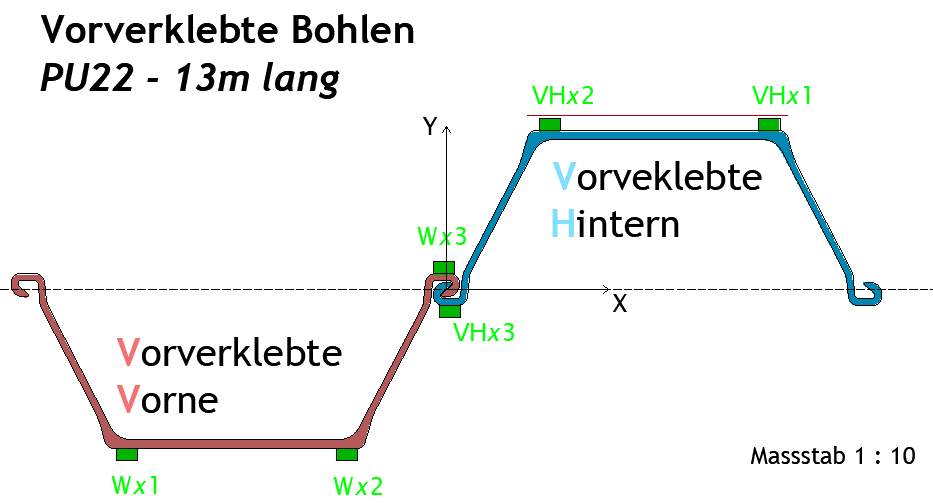

In [ ]:
df_proprietes = pd.read_csv(POSITION_SENSORS, delimiter=';')  
df_proprietes

,name_sensor,depth,x,y,type_sensor,units,face,type_bohlen
0,EV11,2.0,0.45,0.225,DMS,micron,NaN,einzel
1,EV12,2.0,0.15,0.225,DMS,micron,NaN,einzel
2,EV13,2.0,0.00,-0.022,DMS,micron,NaN,einzel
3,EV21,4.5,0.45,0.225,DMS,micron,NaN,einzel
4,EV22,4.5,0.15,0.225,DMS,micron,NaN,einzel
5,EV23,4.5,0.00,-0.022,DMS,micron,NaN,einzel
6,EV31,7.5,0.45,0.225,DMS,micron,NaN,einzel
7,EV32,7.5,0.15,0.225,DMS,micron,NaN,einzel
8,EV33,7.5,0.00,-0.022,DMS,micron,NaN,einzel
9,EH11,2.0,-0.45,-0.225,DMS,micron,NaN,einzel


In [ ]:
# Verklebte Bohlen
df = df_proprietes.loc[df_proprietes['type_bohlen'] == 'verkl']
df['z'] = -1 * df['depth']
fig = px.scatter_3d(df, x='x', y='y', z='z', color='type_sensor', text='name_sensor')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Einzelbohlen
df = df_proprietes.loc[df_proprietes['type_bohlen'] == 'einzel']
df['z'] = -1 * df['depth']
fig = px.scatter_3d(df, x='x', y='y', z='z', color='type_sensor', text='name_sensor')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Clean data

### Interpolate and fill na values

In [ ]:
#TODO: make a difference between no measures in a day d and sensor out of service

def clean(df):
    ## interpolate and fillna
  df = df.interpolate(method='time')
  df = df.fillna(method='bfill')

  return df

In [ ]:
# example
# before
fig = go.Figure()

for col in df_measured_defo.columns:
  fig.add_trace(
      go.Scatter(x=df_measured_defo.index, y=df_measured_defo[col], 
                  name=col, 
                  mode='lines+markers',
                  marker=dict(size=3)
                  )
  )

fig.show()

In [ ]:
# example
# after
clean_defo = clean(df_measured_defo)
fig = go.Figure()

for col in clean_defo.columns:
  fig.add_trace(
      go.Scatter(x=clean_defo.index, y=clean_defo[col], 
                  name=col, 
                  mode='lines+markers',
                  marker=dict(size=3)
                  )
  )

fig.show()

In [ ]:
# test
# assert sensor VH21 out of service after july 14
# assert measures sensor W11 stable
# assert measures sensor W21 stable

### Deformations from a zero measure

In [ ]:
#export
from spundsteif.inclinometers import get_zero_measure_date

def relative_defo(df, start_date):

  date_0 = get_zero_measure_date(df.index, start_date)

  measure_0 = df.loc[df.index == date_0]

  df = df - measure_0.to_numpy()

  df.loc[df.index < date_0] = np.nan

  return df

In [ ]:
# example
# before
before = clean(df_measured_defo)

fig = go.Figure()

for col in before.columns:
  fig.add_trace(
      go.Scatter(x=before.index, y=before[col], 
                  name=col, 
                  mode='lines+markers',
                  marker=dict(size=3)
                  )
  )

fig.show()

In [ ]:
# example
# after
start_date = date(2021, 7, 18)
after = relative_defo(clean(df_measured_defo), start_date)

fig = go.Figure()

for col in after.columns:
  fig.add_trace(
      go.Scatter(x=after.index, y=after[col], 
                  name=col, 
                  mode='lines+markers',
                  marker=dict(size=3)
                  )
  )

fig.show()

In [ ]:
# test
df_cleaned = clean(df_measured_defo)
date_0 = get_zero_measure_date(df_cleaned.index, date(2021, 7, 18))
measure_0 = df_cleaned.loc[df_cleaned.index == date_0]

assert before['EH13']['2021-08-05'] == after['EH13']['2021-08-05'] + measure_0['EH13'].item()
assert before['VH22']['2021-07-28'] == after['VH22']['2021-07-28'] + measure_0['VH22'].item()
assert pd.isna(after['EH13']['2021-07-07'])

### Patch sensors

In [ ]:
#TODO

# check and modify sensors W11, W21 and W32

In [ ]:
#export
def patch_sensors(df):
  disf_sensors = ['W11', 'W21', 'W32']

  #TODO code something clever...
  df = df.drop(columns=disf_sensors)

  return df

### Get deformations

In [ ]:
#export
# TODO: make sure zero measure date is OK
def get_deformations(df):

  df = clean(df)
  df = relative_defo(df, date(2021, 7, 18))
  df = patch_sensors(df)

  return df

In [ ]:
# example
defo = get_deformations(df_measured_defo)

fig = go.Figure()

for col in defo.columns:
  fig.add_trace(
      go.Scatter(x=defo.index, y=defo[col], 
                  name=col, 
                  mode='lines+markers',
                  marker=dict(size=5)
                  )
  )

fig.show()

In [ ]:
#TODO
# get defo along the cross section

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 01_sensors.ipynb.
Converted 02_inclinometers.ipynb.
Converted 03_pressures.ipynb.
Converted 04_deformations.ipynb.
Converted index.ipynb.
